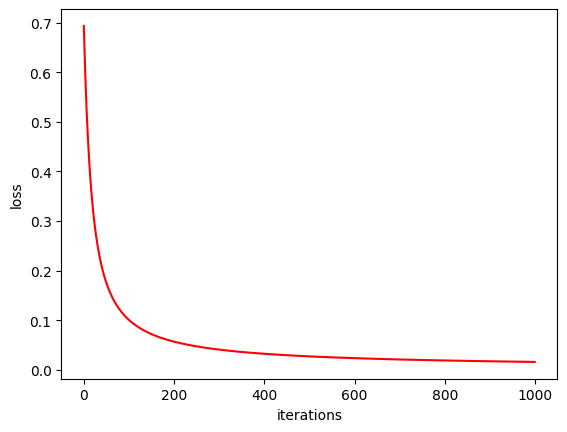

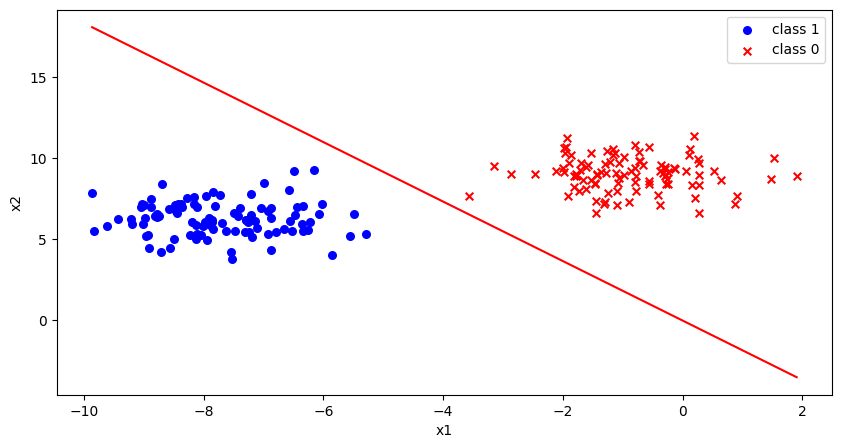

In [2]:
import matplotlib.pyplot as plt
import numpy as np


class LogisticRegession:
    #define sigmoid function
    def sigmoid(self, x):
        y_prob = 1.0 / (1.0 + np.exp(-x))
        return y_prob

    #define prediction function
    def predict_prob(self, x):
        y_prob = self.sigmoid(np.dot(x, self.w) + self.b)  # see Eq.(2.7)
        return y_prob

    #define prediction function
    def predict(self, X):
        inst_num = X.shape[0]
        probs = self.predict_prob(X)
        labels = np.zeros(inst_num)
        for i in range(inst_num):
            if probs[i] >= 0.5:
                labels[i] = 1
        return probs, labels

    #define loss function
    def loss_function(self, train_x, train_y):
        inst_num = train_x.shape[0]
        loss = 0.0
        for i in range(inst_num):
            z = np.dot(train_x[i, :], self.w) + self.b
            loss += -train_y[i] * z + np.log(1 + np.exp(z))  #see Eq.(2.10)
        loss = loss / inst_num
        return loss

    #define gradient calculation function
    def calculate_grad(self, train_x, train_y):
        inst_num = train_x.shape[0]  # data size
        probs = self.sigmoid(train_x.dot(self.w) + self.b)  # training prediction
        #Add code here to calculate grad of weights, see Eq.(2.11)
        # Add code here to calculate grad of bias, see Eq.(2.12)
        grad_w = (train_x.T).dot((probs - train_y)) / inst_num
        grad_b = np.sum((probs - train_y)) / inst_num
        return grad_w, grad_b

    # gradient descent algorithm
    def gradient_descent(self, train_x, train_y, learn_rate, max_iter, epsilon):
        loss_list = []
        for i in range(max_iter):
            loss_old = self.loss_function(train_x, train_y)
            loss_list.append(loss_old)
            grad_w, grad_b = self.calculate_grad(train_x, train_y)
            self.w = self.w - learn_rate * grad_w
            self.b = self.b - learn_rate * grad_b
            loss_new = self.loss_function(train_x, train_y)
            if abs(loss_new - loss_old) <= epsilon:
                break
        return loss_list

    # learning linear regression model
    def fit(self, train_x, train_y, learn_rate, max_iter, epsilon):
        feat_num = train_x.shape[1]  # feature dimension
        self.w = np.zeros((feat_num, 1))  # initialize model parameters
        self.b = 0.0
        #learn model parameters using gradient descent algorithm
        loss_list = self.gradient_descent(train_x, train_y, learn_rate, max_iter, epsilon)
        self.training_visualization(loss_list)

    # learning process visualization
    def training_visualization(self, loss_list):
        plt.plot(loss_list, color="red")
        plt.xlabel("iterations")
        plt.ylabel("loss")
        plt.savefig("loss.png", bbox_inches="tight", dpi=400)
        plt.show()


#构造训练数据集
from sklearn.datasets import make_blobs
import pandas as pd

# make blob data
data, label = make_blobs(n_samples=200, n_features=2, centers=2)
train_x = np.array(data)
label = np.array(label)
train_label = label.reshape(-1, 1)
#设置参数
#train logistic regression model
LR = LogisticRegession()
LR.fit(data, train_label, 0.01, 1000, 0.00001)
#绘制模型的决策结界
#show decision boundary
df = pd.DataFrame()
df['x1'] = data[:, 0]
df['x2'] = data[:, 1]
df['class'] = label
positive = df[df["class"] == 1]
negative = df[df["class"] == 0]
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(positive["x1"], positive["x2"], s=30, c="b", marker="o", label="class 1")
ax.scatter(negative["x1"], negative["x2"], s=30, c="r", marker="x", label="class 0")
ax.legend()
ax.set_xlabel("x1")
ax.set_ylabel("x2")
orig_data = df.values
cols = orig_data.shape[1]
data_mat = orig_data[:, 0:cols - 1]
a = min(data_mat[:, 0])
b = max(data_mat[:, 0])
lin_x = np.linspace(a, b, 200)
lin_y = (-float(LR.b) - LR.w[0, 0] * lin_x) / LR.w[1, 0]
plt.plot(lin_x, lin_y, color="red")
plt.savefig("result.png", bbox_inches='tight', dpi=400)


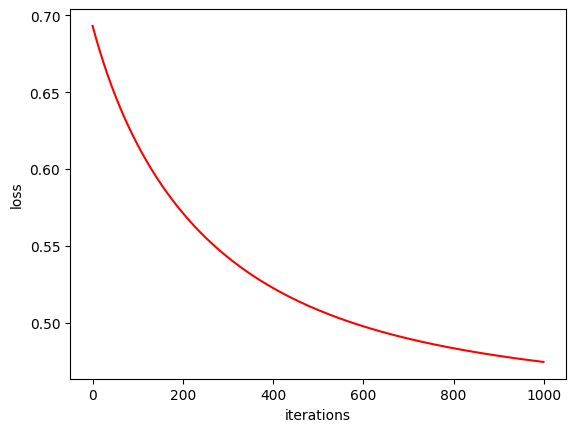

LR ACC:0.795
LR_SKL ACC:0.793


In [19]:
#import necessray libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from Logistic_Regression import LogisticRegession as LR
from sklearn.linear_model import LogisticRegression as LR_SKL


class LogisticRegession:
    #define sigmoid function
    def sigmoid(self, x):
        y_prob = 1.0 / (1.0 + np.exp(-x))
        return y_prob

    #define prediction function
    def predict_prob(self, x):
        y_prob = self.sigmoid(np.dot(x, self.w) + self.b)  # see Eq.(2.7)
        return y_prob

    #define prediction function
    def predict(self, X):
        inst_num = X.shape[0]
        probs = self.predict_prob(X)
        labels = np.zeros(inst_num)
        for i in range(inst_num):
            if probs[i] >= 0.5:
                labels[i] = 1
        return probs, labels

    #define loss function
    def loss_function(self, train_x, train_y):
        inst_num = train_x.shape[0]
        loss = 0.0
        for i in range(inst_num):
            z = np.dot(train_x[i, :], self.w) + self.b
            loss += -train_y[i] * z + np.log(1 + np.exp(z))  #see Eq.(2.10)
        loss = loss / inst_num
        return loss

    #define gradient calculation function
    def calculate_grad(self, train_x, train_y):
        inst_num = train_x.shape[0]  # data size
        probs = self.sigmoid(train_x.dot(self.w) + self.b)  # training prediction
        #Add code here to calculate grad of weights, see Eq.(2.11)
        # Add code here to calculate grad of bias, see Eq.(2.12)
        grad_w = (train_x.T).dot((probs - train_y)) / inst_num
        grad_b = np.sum((probs - train_y)) / inst_num
        return grad_w, grad_b

    # gradient descent algorithm
    def gradient_descent(self, train_x, train_y, learn_rate, max_iter, epsilon):
        loss_list = []
        for i in range(max_iter):
            loss_old = self.loss_function(train_x, train_y)
            loss_list.append(loss_old)
            grad_w, grad_b = self.calculate_grad(train_x, train_y)
            self.w = self.w - learn_rate * grad_w
            self.b = self.b - learn_rate * grad_b
            loss_new = self.loss_function(train_x, train_y)
            if abs(loss_new - loss_old) <= epsilon:
                break
        return loss_list

    # learning linear regression model
    def fit(self, train_x, train_y, learn_rate, max_iter, epsilon):
        feat_num = train_x.shape[1]  # feature dimension
        self.w = np.zeros((feat_num, 1))  # initialize model parameters
        self.b = 0.0
        #learn model parameters using gradient descent algorithm
        loss_list = self.gradient_descent(train_x, train_y, learn_rate, max_iter, epsilon)
        self.training_visualization(loss_list)

    # learning process visualization
    def training_visualization(self, loss_list):
        plt.plot(loss_list, color="red")
        plt.xlabel("iterations")
        plt.ylabel("loss")
        plt.savefig("loss.png", bbox_inches="tight", dpi=400)
        plt.show()


# load experiment data
f=open('Stock_Client_loss.csv',encoding='gbk')
data = pd.read_csv(f)
data_x = data[['账户资金（元）','最后一次交易距今时间（天）','上月交易佣金（元）','累计交易佣金（元）','本券商使用时长（年）']]
data_y = np.array(data["是否流失"])
# data normalization
scaler = StandardScaler()
data_x = scaler.fit_transform(data_x)
# divide data into train/test, 70% for train, 30% for test
X_train, X_test, Y_train, Y_test = train_test_split(data_x,
                                                    data_y,
                                                    test_size=0.3,
                                                    shuffle=True)
# set training parameters and define eval metric
learnrate = 0.01
maxiter = 1000
eps = 1e-5


def cal_acc(y_test, y_pred):
    acc = 0.0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            acc += 1.0
    return acc / len(y_test)


# build prediction model using LR
LR_model = LogisticRegession()
LR_model.fit(train_x=X_train, train_y=Y_train.reshape(-1, 1),
             learn_rate=learnrate, max_iter=maxiter, epsilon=eps)
_, Y_test_pred_LR = LR_model.predict(X_test)
acc = cal_acc(Y_test, Y_test_pred_LR)
print("LR ACC:%.3f" % (acc))
# build prediction model using LR_SKL
LR_SKL_model = LR_SKL()
LR_SKL_model.fit(X_train, Y_train)
Y_test_pred_LR_SKL = LR_SKL_model.predict(X_test)
acc = cal_acc(Y_test, Y_test_pred_LR_SKL)
print("LR_SKL ACC:%.3f" % (acc))

In [20]:
y_score=LR_SKL_model.predict_proba(X_test)[:, 1]

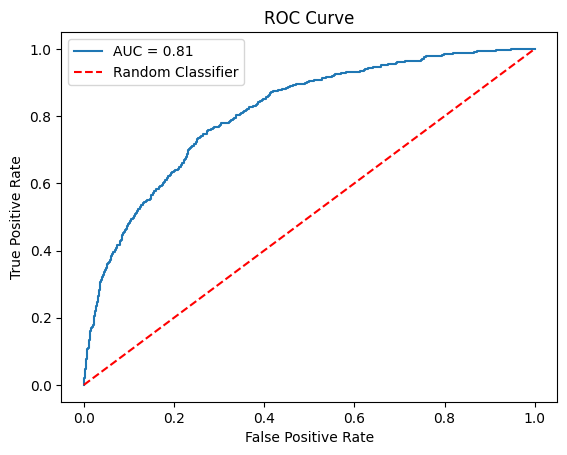

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(Y_test, y_score)
auc_score = roc_auc_score(Y_test, y_score)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')  # 绘制ROC曲线，标注AUC的值
# 随即分类器没有分类能力，其FPR=TPR。随机分类器的性能通常表示为ROC曲线上的对角线
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')  # 绘制随机分类器的ROC曲线
plt.xlabel('False Positive Rate')  # x轴标签为FPR
plt.ylabel('True Positive Rate')   # y轴标签为TPR
plt.title('ROC Curve')             # 设置标题
plt.legend()
plt.show()

In [7]:
data = pd.read_csv('Stock_Client_loss.csv', encoding='GBK')
print(data.columns)  # 打印出列名，确认是否包含'x1', 'x2', 'x3', 'x4', 'x5'


Index(['账户资金（元）', '最后一次交易距今时间（天）', '上月交易佣金（元）', '累计交易佣金（元）', '本券商使用时长（年）',
       '是否流失'],
      dtype='object')
